# Exercícios Análise de Regressão

-----

## Modelos Polinomiais

-----

## 1 - Modelos Polinomiais

In [544]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

### I - Simule um conjunto de dados hipotético com várias variáveis independentes e diferentes termos polinomiais.

In [545]:
np.random.seed(11102023)
X1 = np.random.rand(100)
np.random.seed(11102024)
X2 = np.random.rand(100)
np.random.seed(11102025)

Y = 1 * X1 + 2 * X1**2 - 3 * X2 + (10 + np.random.randn(100)/3)

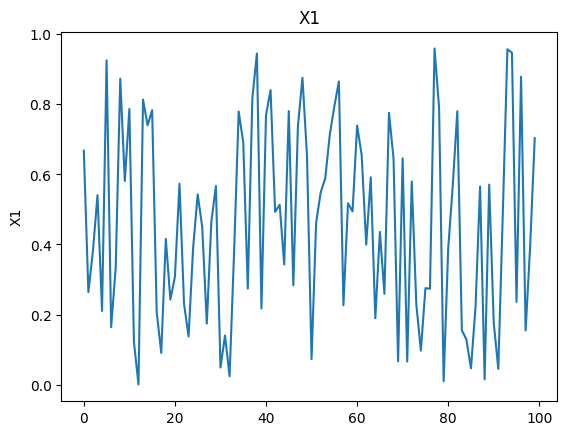

In [546]:
plt.plot(X1)
plt.title("X1")
plt.ylabel('X1')
plt.show()

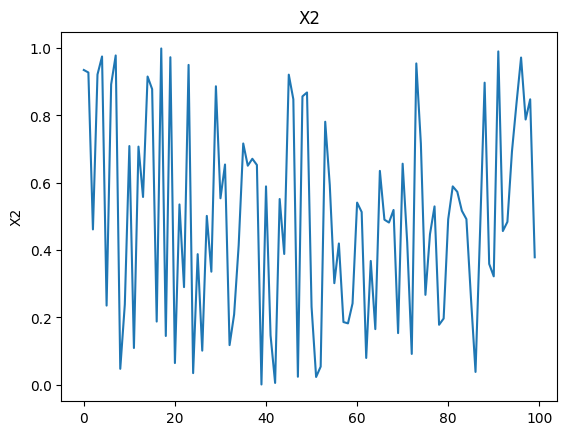

In [547]:
plt.plot(X2)
plt.title("X2")
plt.ylabel('X2')
plt.show()

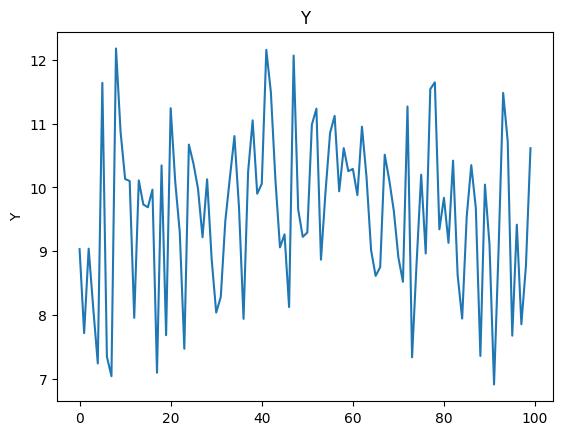

In [548]:
plt.plot(Y)
plt.title("Y")
plt.ylabel('Y')
plt.show()

### II - Ajuste um modelo de regressão linear simples para prever Y com base em X.

In [549]:
x_df = pd.DataFrame({'x1^1':X1, 'x2^1':X2})
x_df = sm.add_constant(x_df)
modelo = sm.OLS(Y,x_df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     613.5
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           8.86e-56
Time:                        19:42:54   Log-Likelihood:                -34.352
No. Observations:                 100   AIC:                             74.70
Df Residuals:                      97   BIC:                             82.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6950      0.087    111.317      0.0

### Regressão: Y = 9.6950 + 3.0210 . X1 - 3.0078 . X2

### III - Avalie o ajuste do modelo e os coeficientes de regressão.

Text(0.5, 1.0, 'Gráfico de Dispersão dos Resíduos')

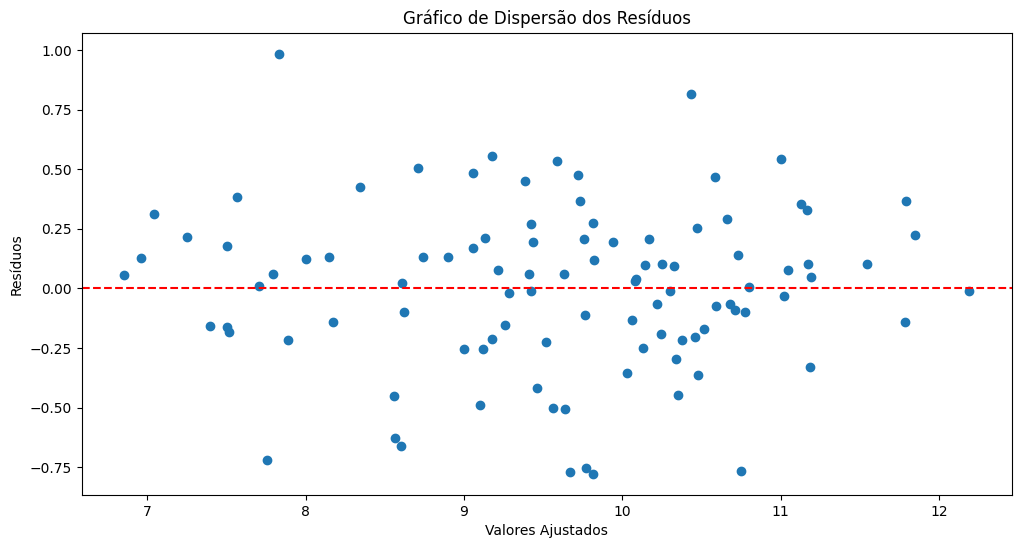

In [550]:
plt.figure(figsize=(12, 6))
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")

In [551]:
vif = pd.DataFrame()
vif["Variável"] = x_df.columns
vif["VIF"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
print(vif)

  Variável       VIF
0    const  6.321823
1     x1^1  1.000843
2     x2^1  1.000843


In [552]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(modelo.resid, x_df)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 1.6997796444240043), ('LM-Test p-value', 0.42746202617480733), ('F-Statistic', 0.8386483006483734), ('F-Test p-value', 0.4354044181438306)]


#### Como se trata de um modelo com duas variáveis independentes, fica difícil de visualizar graficamente. Porém a distribuição dos resíduos parece promissora. Pois aparenetemente se mantem constante em toda a série.

#### Analisando os coeficientes:
R2 = 0.927 (Alto, OK)

AIC = 74.70

VIF x1^1 = 1 (Menor que 5, OK)

VIF x2^1 = 1 (Menor que 5, OK)

F-Test p-value = 0.435 (Maior que 0.05, OK)

### IV - Agora, ajuste um modelo polinomial de segunda ordem (ou seja, uma regressão quadrática) usando X e X^2 para prever Y.

In [553]:
# X1, X2, X1^2, X2^2 - AIC = 65.68 
# x_df = pd.DataFrame({'x1^1':X1, 'x2^1':X2,'x1^2':X1**2, 'x2^2':X2**2})

# X1, X2, X1^2, X2^2, X1^3, X2^3 - AIC = 68.10
# x_df = pd.DataFrame({'x1^1':X1, 'x2^1':X2,'x1^2':X1**2, 'x2^2':X2**2,'x1^3':X1**3, 'x2^3':X2**3})

# X1, X2, X1^2 - AIC = 65.54 (MENOR AIC)
x_df = pd.DataFrame({'x1^1':X1, 'x2^1':X2,'x1^2':X1**2})

# X1, X2, X2^2 - AIC = 75.53
# x_df = pd.DataFrame({'x1^1':X1, 'x2^1':X2,'x2^2':X2**2})

# X2, X1^2 - AIC = 73.36 
# x_df = pd.DataFrame({'x2^1':X2,'x1^2':X1**2})

x_df = sm.add_constant(x_df)
modelo = sm.OLS(Y,x_df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     456.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           1.17e-56
Time:                        19:42:54   Log-Likelihood:                -28.771
No. Observations:                 100   AIC:                             65.54
Df Residuals:                      96   BIC:                             75.96
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9528      0.113     88.265      0.0

Text(0.5, 1.0, 'Gráfico de Dispersão dos Resíduos')

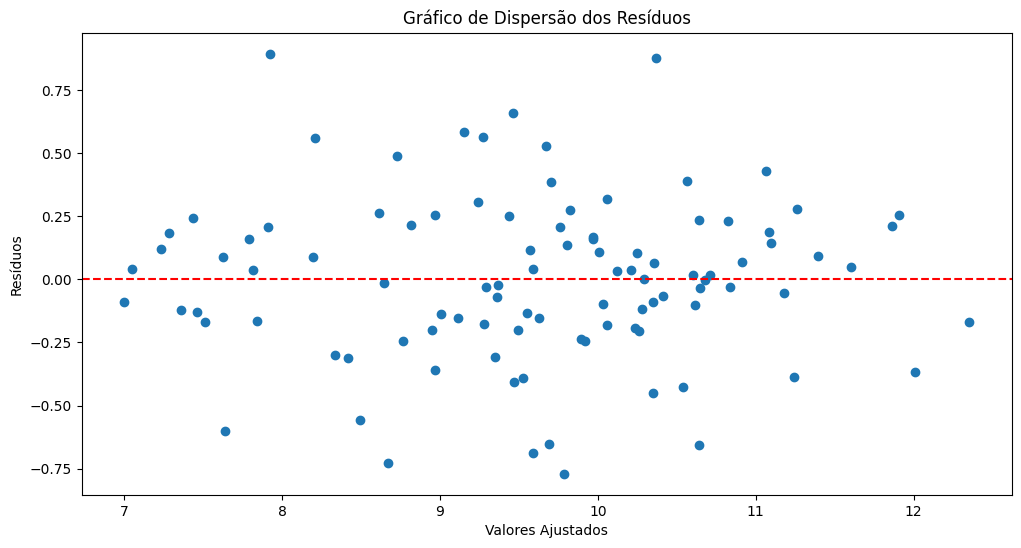

In [554]:
plt.figure(figsize=(12, 6))
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")

In [555]:
vif = pd.DataFrame()
vif["Variável"] = x_df.columns
vif["VIF"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
print(vif)

  Variável        VIF
0    const  11.726242
1     x1^1  15.862831
2     x2^1   1.016921
3     x1^2  15.906442


In [556]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(modelo.resid, x_df)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 5.39910070937627), ('LM-Test p-value', 0.14479961855581988), ('F-Statistic', 1.8263169166000184), ('F-Test p-value', 0.14752162144477837)]


#### V - Compare os modelos de regressão linear simples e polinomial em termos de ajuste e interpretação dos coeficientes.

#### Analisando os coeficientes:
R2 = 0.935 (Maior que o linear, OK)

AIC = 65.54 (Menor que o linear, OK)

VIF x1^1 = 15.86 (Maior que 5, NAO OK)

VIF x2^1 = 1 (Menor que 5, OK)

VIF x1^2 = 15.90 (Maior que 5, NAO OK)

F-Test p-value = 0.14 (Maior que 0.05, OK)

O uso da regressao polinomial melhorou quase tudo, só prejudicou o VIF de X1 e X1**2, isso ocorre pois se trata de uma mesma variavel, causando multicolinearidade. 

Tentei tirar uma delas mas não foi eficiente. Porem vif menor que 10 ou 5 é subjetivo, depende do caso. Nessa circustancia temos um dado simulado, altamente enviesado.


----

## 2 - Análise de Resíduos

### Após ajustar o modelo, analise os resíduos para verificar a qualidade do ajuste das regressões no exercício 1. Observe se há padrões nos resíduos que indiquem problemas com o modelo, como heterocedasticidade. Considere fazer transformações nos dados ou revisar o modelo com base na análise dos resíduos.

### (FEITO DURANTE O EXERCICIO 1)
